In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json

# Load Data Pada CSV dan Proses menjadi Data Time Series

In [3]:
#Load data csv dan format data tahun bulan menjadi data frame
df = pd.read_csv('DATASET_PAJAK_PBBP2.csv')
df['tahun'] = pd.to_datetime(df['tahun_bulan'])
df.head()

,tahun_bulan,jml_setor,tahun
0,2012-1,363667758,2012-01-01
1,2012-2,317627078,2012-02-01
2,2012-3,1777298755,2012-03-01
3,2012-4,2755608275,2012-04-01
4,2012-5,2627243620,2012-05-01


In [4]:
#Buat data tiemseries berdasar key value dari data frame
dts = pd.Series(data=df['jml_setor'].values, index=df['tahun'])
dts.head()
json_data = dts.to_json(date_format='iso')
print(json_data)
with open('./datasets/pbbp2.json', 'w') as f:
    json.dump(json_data, f) 

{"2012-01-01T00:00:00.000":363667758,"2012-02-01T00:00:00.000":317627078,"2012-03-01T00:00:00.000":1777298755,"2012-04-01T00:00:00.000":2755608275,"2012-05-01T00:00:00.000":2627243620,"2012-06-01T00:00:00.000":2815907336,"2012-07-01T00:00:00.000":4783020480,"2012-08-01T00:00:00.000":4855393098,"2012-09-01T00:00:00.000":7265557237,"2012-10-01T00:00:00.000":964547760,"2012-11-01T00:00:00.000":665761869,"2012-12-01T00:00:00.000":654281568,"2013-01-01T00:00:00.000":274003822,"2013-02-01T00:00:00.000":224999257,"2013-03-01T00:00:00.000":394042749,"2013-04-01T00:00:00.000":1032716470,"2013-05-01T00:00:00.000":2535590382,"2013-06-01T00:00:00.000":3511237092,"2013-07-01T00:00:00.000":4189912360,"2013-08-01T00:00:00.000":3751032717,"2013-09-01T00:00:00.000":13788500825,"2013-10-01T00:00:00.000":1870790491,"2013-11-01T00:00:00.000":841906430,"2013-12-01T00:00:00.000":601234450,"2014-01-01T00:00:00.000":703129967,"2014-02-01T00:00:00.000":519913833,"2014-03-01T00:00:00.000":710991007,"2014-04-01T

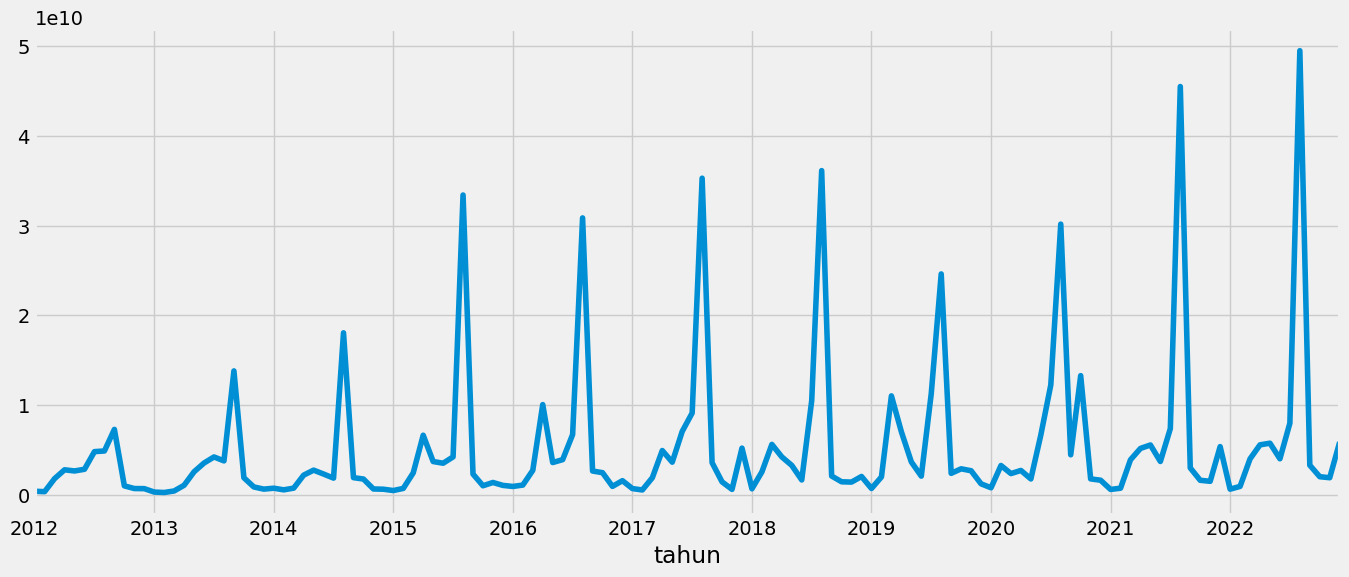

In [5]:
dts = pd.Series(data=df['jml_setor'].values, index=df['tahun'])
dts.plot(figsize=(15, 6))
plt.show()

# Mencari parameter terbaik SARIMA p, d, q

In [5]:
# Tentukan parameter p, d, dan q untuk mengambil nilai antara 0 sampai 5
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Hasilkan semua kombinasi berbeda dari triplet p, q, dan q musiman
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [6]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages
best_result = [0, 0, 10000000]
p_params = [0, 1, 2, 3]
d_params = [0, 1, 2, 3]
q_params = [0, 1, 2, 3]
P_params = [0, 1, 2, 3]
D_params = [0, 1, 2, 3]
Q_params = [0, 1, 2, 3]
for p in p_params:
    for d in d_params:
        for q in q_params:
            for P in P_params:
                for D in D_params:
                    for Q in Q_params:
                        param = [p, d, q]
                        param_seasonal = [P, D, Q, 12]
                        try:
                            mod = sm.tsa.statespace.SARIMAX(dts, order=param, seasonal_order=param_seasonal)
                            results = mod.fit()
                            if results.aic < best_result[2]:
                                best_result = [param, param_seasonal, results.aic]
                                print('Best Result:', best_result)
                        except:
                            continue
print('\nBest Result:', best_result)

Best Result: [[0, 0, 0], [0, 0, 0, 12], 289778.5389355428]
Best Result: [[0, 0, 0], [0, 0, 1, 12], 6403.214911921104]
Best Result: [[0, 0, 0], [0, 1, 1, 12], 5640.819848457019]
Best Result: [[0, 0, 0], [0, 1, 2, 12], 5640.38654447527]
Best Result: [[0, 0, 0], [0, 2, 1, 12], 5101.10518207028]
Best Result: [[0, 0, 0], [1, 2, 1, 12], 5101.04942498371]
Best Result: [[0, 0, 0], [2, 2, 1, 12], 5089.92011596585]
Best Result: [[0, 1, 2], [0, 2, 1, 12], 5082.268353319187]
Best Result: [[0, 1, 2], [0, 2, 3, 12], 5081.1592444164235]
Best Result: [[0, 1, 3], [0, 2, 1, 12], 5078.549263209044]
Best Result: [[0, 1, 3], [0, 2, 3, 12], 5076.892915854747]
Best Result: [[0, 2, 2], [0, 2, 1, 12], 5071.803737452784]
Best Result: [[0, 2, 3], [0, 2, 1, 12], 5064.033151126159]
Best Result: [[2, 2, 3], [0, 2, 1, 12], 5055.902798403013]
Best Result: [[2, 2, 3], [0, 2, 2, 12], 5055.882819136294]
Best Result: [[2, 2, 3], [0, 2, 3, 12], 5054.8432126461885]

Best Result: [[2, 2, 3], [0, 2, 3, 12], 5054.843212646188

In [7]:
 #order=(1, 0, 0),
  #                          seasonal_order=(0, 0, 0, 12),
  #                          enforce_stationarity=False,
    #                        enforce_invertibility=False)

# Plot model diagnostics

In [24]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
mod = sm.tsa.statespace.SARIMAX(dts,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),
                            enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2469.558
Date:                            Sun, 02 Apr 2023   AIC                           4949.117
Time:                                    07:39:27   BIC                           4962.386
Sample:                                01-01-2012   HQIC                          4954.494
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0935      0.116     -0.806      0.420      -0.321       0.134
ma.L1         -0.9967      0.019   

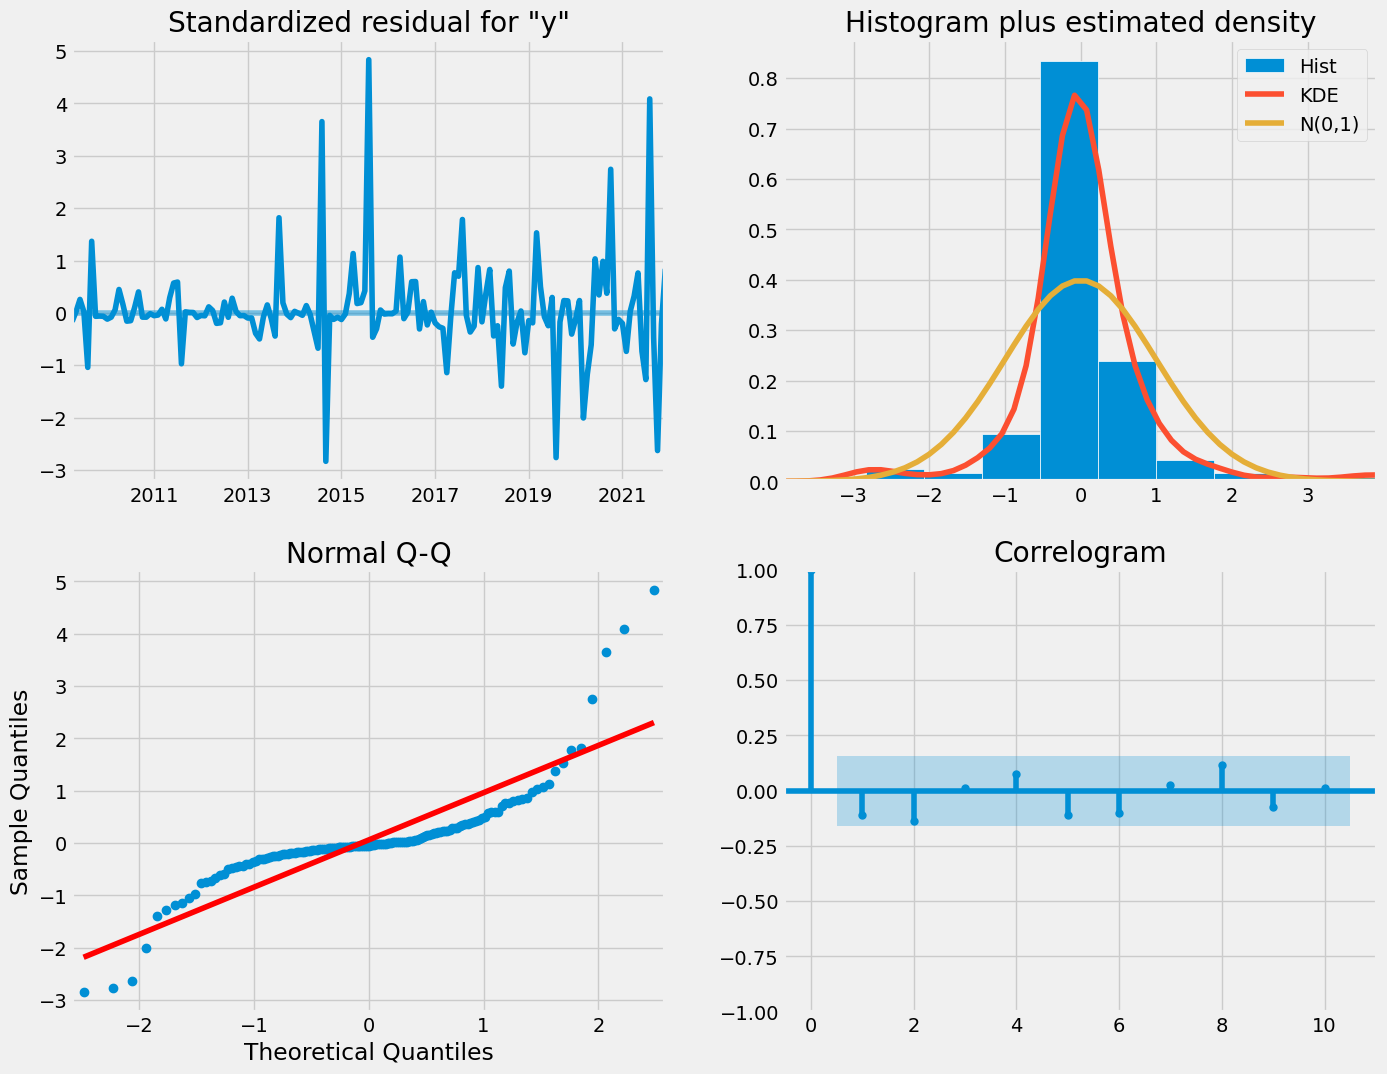

In [9]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

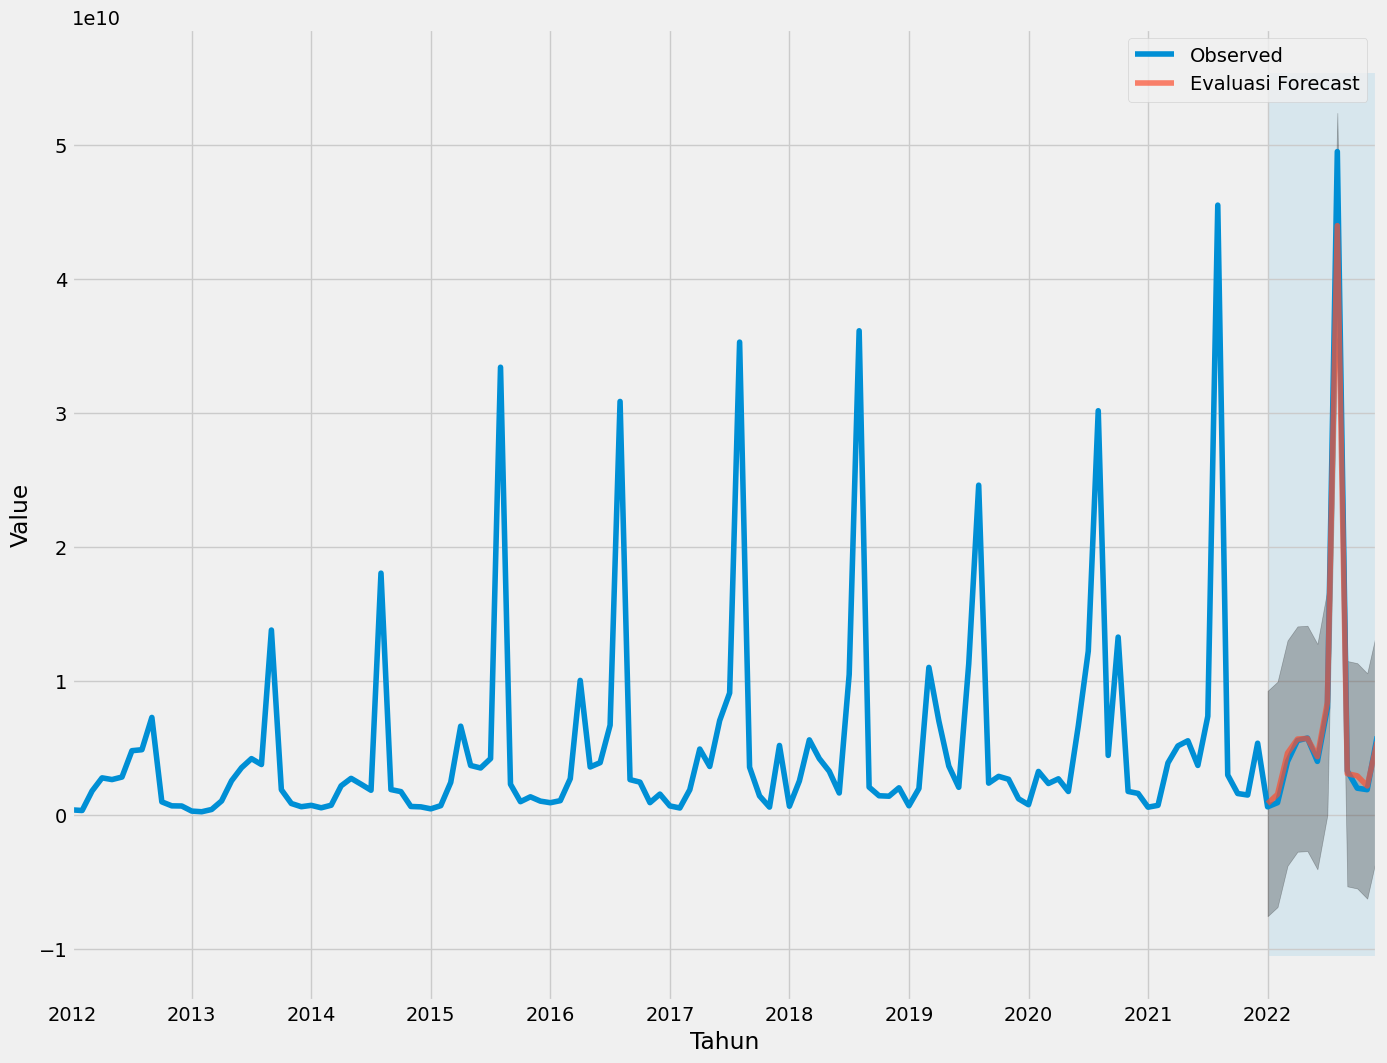

In [25]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dts['2012':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='Evaluasi Forecast', alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2022-01-01'), dts.index[-1],alpha=.1, zorder=-1)
ax.set_xlabel('Tahun')
ax.set_ylabel('Value')
plt.legend()
plt.show()

In [26]:
df_test = df[df.tahun.between('2022-01', '2022-12')]
dts_test = pd.Series(data=df_test['jml_setor'].values, index=df_test['tahun'])
y_test, pred_ahead = np.array(dts_test), np.array(pred.predicted_mean)
list_ape = []
for index, elem in np.ndenumerate(pred_ahead):
    ape = np.abs(elem-y_test[index]) / y_test[index]
    list_ape.append(ape*100)
mape = np.mean(list_ape)
print(list_ape)
print(mape)

[40.36755053758222, 68.65758386227813, 15.82505957679131, 1.998019758714602, 0.44794845000406924, 8.907320033815996, 5.456939520458523, 11.165529657843841, 6.1255483627862874, 46.502882346017664, 14.734825870347468, 6.801676883354063]
18.91590707166618


# Prediksi data selama 2 tahun

In [15]:
# prediksi 24 langkah ke depan di masa mendatang
pred_uc = results.get_forecast(steps=24, dynamic=False)
# Dapatkan interval
pred_ci = pred_uc.conf_int()
json_data = pred_uc.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/pbbp2_predicted.json', 'w') as f:
    json.dump(json_data, f) 

{"2023-01-01T00:00:00.000":1136904599.8873112202,"2023-02-01T00:00:00.000":1531007714.7239484787,"2023-03-01T00:00:00.000":4564832859.4803514481,"2023-04-01T00:00:00.000":5981847681.3103494644,"2023-05-01T00:00:00.000":6031573395.7924089432,"2023-06-01T00:00:00.000":4538437044.4748468399,"2023-07-01T00:00:00.000":8656456420.0807247162,"2023-08-01T00:00:00.000":48377255251.626991272,"2023-09-01T00:00:00.000":3796676889.3767871857,"2023-10-01T00:00:00.000":2848543447.8937783241,"2023-11-01T00:00:00.000":2377376432.5412187576,"2023-12-01T00:00:00.000":6057852606.1830806732,"2024-01-01T00:00:00.000":1607959069.1263051033,"2024-02-01T00:00:00.000":2041107857.0046441555,"2024-03-01T00:00:00.000":5058881900.0475549698,"2024-04-01T00:00:00.000":6408167128.166097641,"2024-05-01T00:00:00.000":6397347211.1662225723,"2024-06-01T00:00:00.000":5015727146.8551893234,"2024-07-01T00:00:00.000":9198454071.7585315704,"2024-08-01T00:00:00.000":48095094993.6704101562,"2024-09-01T00:00:00.000":4262574971.15

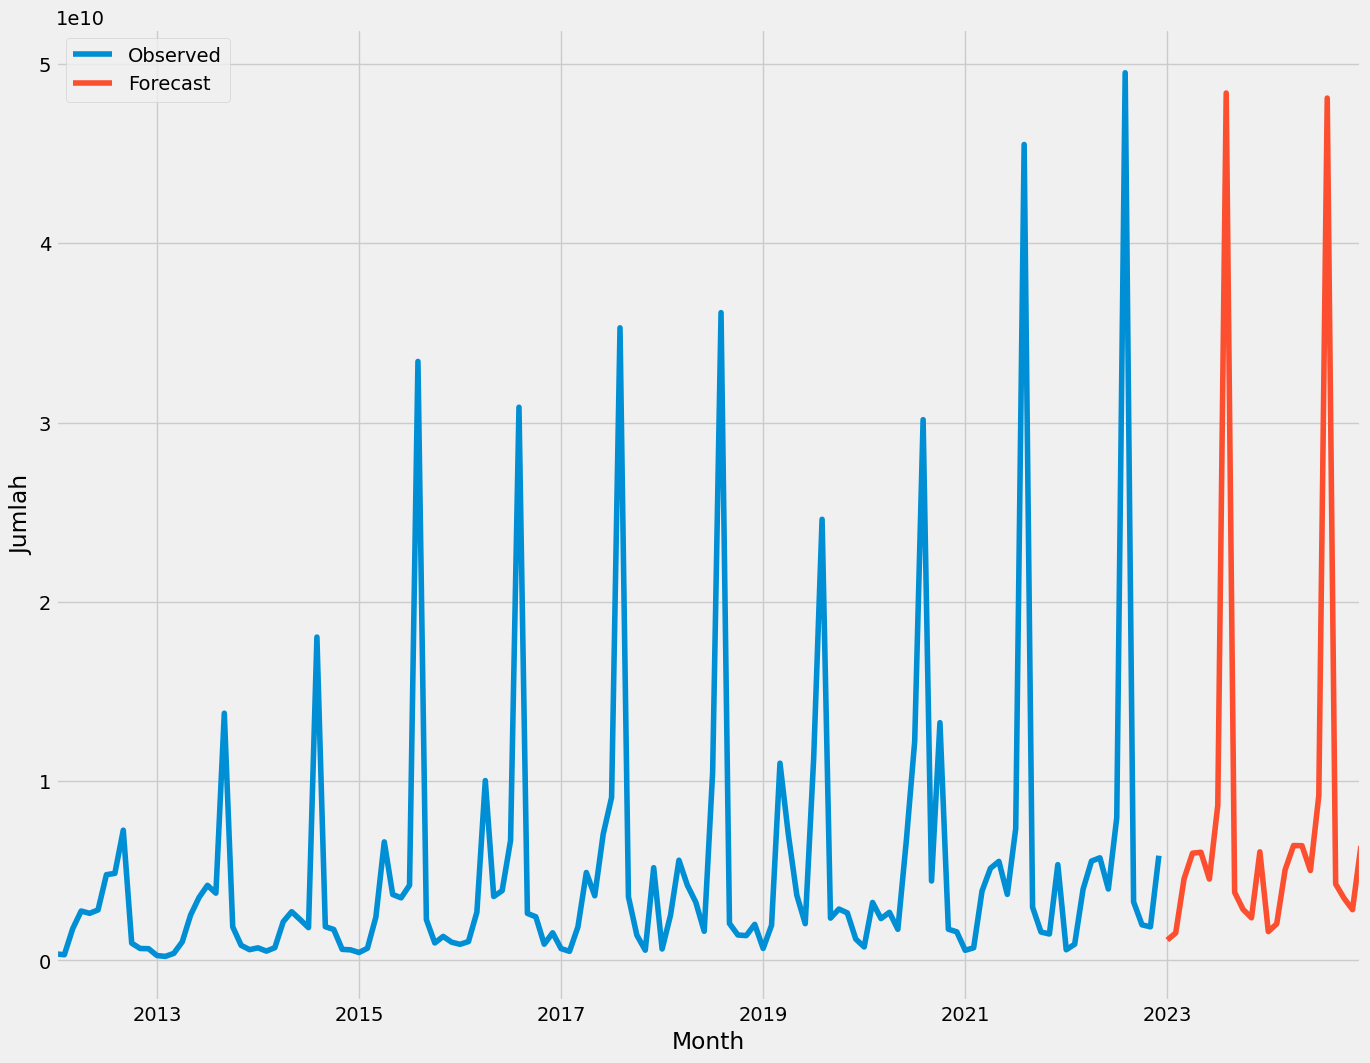

In [16]:
ax = dts.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Month')
ax.set_ylabel('Jumlah')
plt.legend()
plt.show()